In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('data/Dataset_Final_GAS.csv')

print(f"Dataset shape: {df.shape}")
print("\nRepository activity columns:")
activity_columns = ['repoAge', 'stars', 'forks', 'commits', 'commitsInLast6Months', 
                   'committersParticipation', 'totalIssues', 'openIssues', 'closedIssues', 'AvgIssueCloseTime']
for col in activity_columns:
    if col in df.columns:
        print(f"  {col}: {df[col].dtype}")

# Check data availability
print(f"\nData availability for key metrics:")
for col in activity_columns:
    if col in df.columns:
        non_null = df[col].notna().sum()
        print(f"  {col}: {non_null}/{len(df)} ({non_null/len(df)*100:.1f}%)")


Dataset shape: (491, 74)

Repository activity columns:
  repoAge: int64
  stars: int64
  forks: int64
  commits: int64
  commitsInLast6Months: int64
  committersParticipation: int64
  totalIssues: int64
  openIssues: int64
  closedIssues: int64
  AvgIssueCloseTime: float64

Data availability for key metrics:
  repoAge: 491/491 (100.0%)
  stars: 491/491 (100.0%)
  forks: 491/491 (100.0%)
  commits: 491/491 (100.0%)
  commitsInLast6Months: 491/491 (100.0%)
  committersParticipation: 491/491 (100.0%)
  totalIssues: 491/491 (100.0%)
  openIssues: 491/491 (100.0%)
  closedIssues: 491/491 (100.0%)
  AvgIssueCloseTime: 491/491 (100.0%)


In [2]:
# Prepare data for analysis
# Convert numeric columns and handle missing values
numeric_columns = ['repoAge', 'stars', 'forks', 'commits', 'commitsInLast6Months', 
                   'committersParticipation', 'totalIssues', 'openIssues', 'closedIssues', 'AvgIssueCloseTime']

# Convert to numeric
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a subset with available data
activity_data = df[numeric_columns].copy()

# Calculate basic statistics
print("Repository Activity Statistics:")
print("=" * 50)
for col in numeric_columns:
    if col in activity_data.columns:
        data = activity_data[col].dropna()
        if len(data) > 0:
            print(f"\n{col}:")
            print(f"  Count: {len(data)}")
            print(f"  Mean: {data.mean():.2f}")
            print(f"  Median: {data.median():.2f}")
            print(f"  Std: {data.std():.2f}")
            print(f"  Min: {data.min():.2f}")
            print(f"  Max: {data.max():.2f}")
            print(f"  MAD: {np.median(np.abs(data - data.median())):.2f}")
        else:
            print(f"\n{col}: No data available")


Repository Activity Statistics:

repoAge:
  Count: 491
  Mean: 1555.02
  Median: 1386.00
  Std: 885.56
  Min: 244.00
  Max: 5611.00
  MAD: 550.00

stars:
  Count: 491
  Mean: 74.35
  Median: 2.00
  Std: 620.01
  Min: 0.00
  Max: 11963.00
  MAD: 2.00

forks:
  Count: 491
  Mean: 11.24
  Median: 0.00
  Std: 99.99
  Min: 0.00
  Max: 1966.00
  MAD: 0.00

commits:
  Count: 491
  Mean: 333.38
  Median: 31.00
  Std: 3046.94
  Min: 1.00
  Max: 65860.00
  MAD: 26.00

commitsInLast6Months:
  Count: 491
  Mean: 5.04
  Median: 0.00
  Std: 48.24
  Min: 0.00
  Max: 954.00
  MAD: 0.00

committersParticipation:
  Count: 491
  Mean: 4.22
  Median: 1.00
  Std: 33.19
  Min: 1.00
  Max: 698.00
  MAD: 0.00

totalIssues:
  Count: 491
  Mean: 29.44
  Median: 0.00
  Std: 392.02
  Min: 0.00
  Max: 8363.00
  MAD: 0.00

openIssues:
  Count: 491
  Mean: 10.63
  Median: 0.00
  Std: 133.92
  Min: 0.00
  Max: 2855.00
  MAD: 0.00

closedIssues:
  Count: 491
  Mean: 20.09
  Median: 0.00
  Std: 261.42
  Min: 0.00
  Max

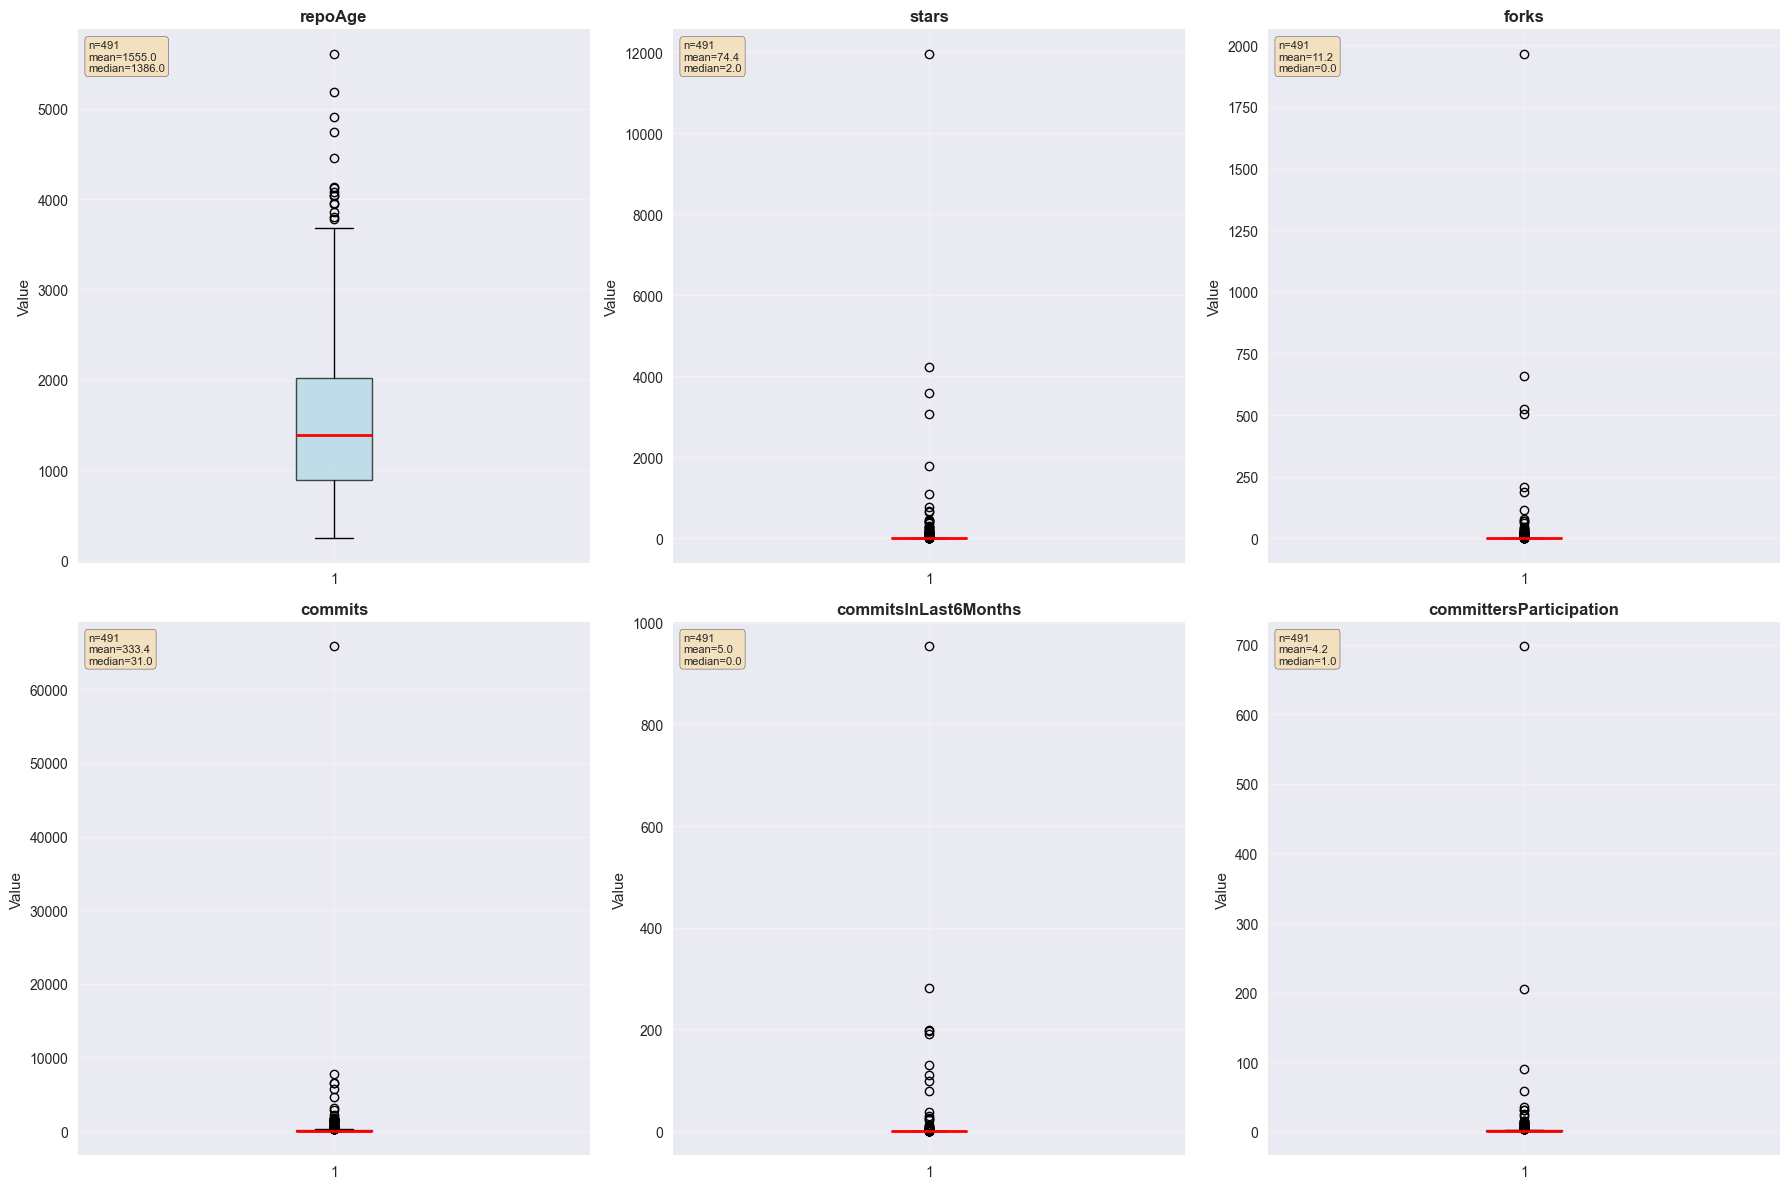

In [3]:
# Create boxplots for repository activity metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Define metrics to plot (excluding AvgIssueCloseTime which might have different scale)
plot_metrics = ['repoAge', 'stars', 'forks', 'commits', 'commitsInLast6Months', 'committersParticipation']

for i, metric in enumerate(plot_metrics):
    if metric in activity_data.columns:
        data = activity_data[metric].dropna()
        if len(data) > 0:
            axes[i].boxplot(data, patch_artist=True, 
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
            axes[i].set_title(f'{metric}', fontweight='bold')
            axes[i].set_ylabel('Value')
            axes[i].grid(True, alpha=0.3)
            
            # Add statistics text
            stats_text = f'n={len(data)}\nmean={data.mean():.1f}\nmedian={data.median():.1f}'
            axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                        verticalalignment='top', fontsize=8,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
            axes[i].text(0.5, 0.5, 'No data', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{metric} (No data)', fontweight='bold')
    else:
        axes[i].text(0.5, 0.5, 'Column not found', ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'{metric} (Not found)', fontweight='bold')

# Hide the last subplot if not needed
if len(plot_metrics) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


Issue Management Statistics:

totalIssues:
  Count: 491
  Mean: 29.44
  Median: 0.00
  Std: 392.02
  Min: 0.00
  Max: 8363.00

openIssues:
  Count: 491
  Mean: 10.63
  Median: 0.00
  Std: 133.92
  Min: 0.00
  Max: 2855.00

closedIssues:
  Count: 491
  Mean: 20.09
  Median: 0.00
  Std: 261.42
  Min: 0.00
  Max: 5508.00

AvgIssueCloseTime:
  Count: 491
  Mean: 7.58
  Median: 0.00
  Std: 71.89
  Min: 0.00
  Max: 1099.08


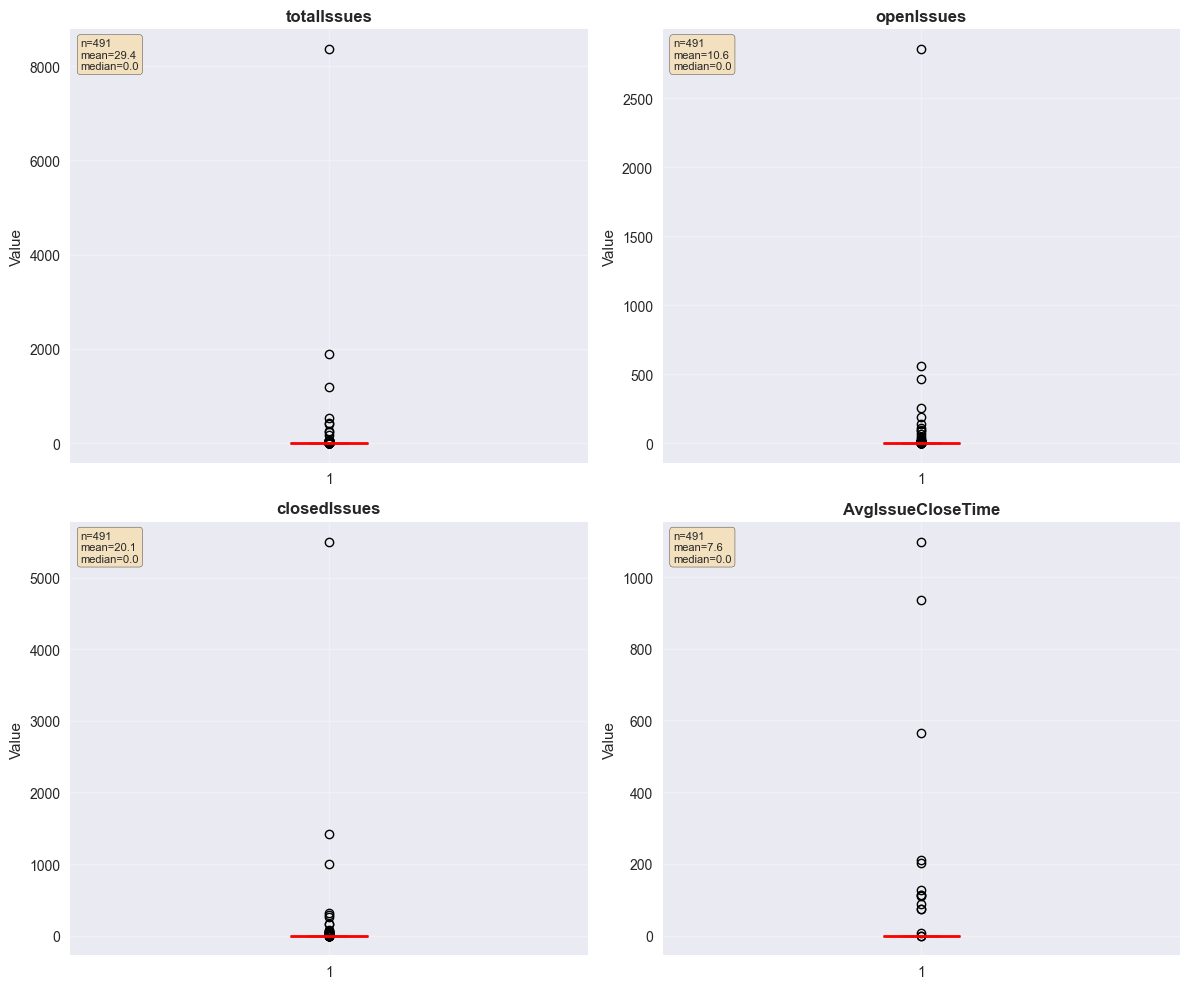

In [4]:
# Issue management analysis
issue_metrics = ['totalIssues', 'openIssues', 'closedIssues', 'AvgIssueCloseTime']

print("Issue Management Statistics:")
print("=" * 40)

for metric in issue_metrics:
    if metric in activity_data.columns:
        data = activity_data[metric].dropna()
        if len(data) > 0:
            print(f"\n{metric}:")
            print(f"  Count: {len(data)}")
            print(f"  Mean: {data.mean():.2f}")
            print(f"  Median: {data.median():.2f}")
            print(f"  Std: {data.std():.2f}")
            print(f"  Min: {data.min():.2f}")
            print(f"  Max: {data.max():.2f}")
        else:
            print(f"\n{metric}: No data available")

# Create boxplots for issue metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, metric in enumerate(issue_metrics):
    if metric in activity_data.columns:
        data = activity_data[metric].dropna()
        if len(data) > 0:
            axes[i].boxplot(data, patch_artist=True, 
                          boxprops=dict(facecolor='lightcoral', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
            axes[i].set_title(f'{metric}', fontweight='bold')
            axes[i].set_ylabel('Value')
            axes[i].grid(True, alpha=0.3)
            
            # Add statistics text
            stats_text = f'n={len(data)}\nmean={data.mean():.1f}\nmedian={data.median():.1f}'
            axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                        verticalalignment='top', fontsize=8,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
            axes[i].text(0.5, 0.5, 'No data', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{metric} (No data)', fontweight='bold')
    else:
        axes[i].text(0.5, 0.5, 'Column not found', ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'{metric} (Not found)', fontweight='bold')

plt.tight_layout()
plt.show()


In [5]:
# Create comprehensive statistics table
all_metrics = ['repoAge', 'stars', 'forks', 'commits', 'commitsInLast6Months', 
               'committersParticipation', 'totalIssues', 'openIssues', 'closedIssues', 'AvgIssueCloseTime']

stats_table = []

for metric in all_metrics:
    if metric in activity_data.columns:
        data = activity_data[metric].dropna()
        if len(data) > 0:
            stats = {
                'Metric': metric,
                'Count': len(data),
                'Mean': f"{data.mean():.2f}",
                'Std': f"{data.std():.2f}",
                'Median': f"{data.median():.2f}",
                'MAD': f"{np.median(np.abs(data - data.median())):.2f}",
                'Min': f"{data.min():.2f}",
                'Max': f"{data.max():.2f}"
            }
        else:
            stats = {
                'Metric': metric,
                'Count': 0,
                'Mean': 'N/A',
                'Std': 'N/A',
                'Median': 'N/A',
                'MAD': 'N/A',
                'Min': 'N/A',
                'Max': 'N/A'
            }
    else:
        stats = {
            'Metric': metric,
            'Count': 'N/A',
            'Mean': 'N/A',
            'Std': 'N/A',
            'Median': 'N/A',
            'MAD': 'N/A',
            'Min': 'N/A',
            'Max': 'N/A'
        }
    stats_table.append(stats)

# Convert to DataFrame and display
stats_df = pd.DataFrame(stats_table)
print("Repository Activity Statistics Table:")
print("=" * 80)
print(stats_df.to_string(index=False))

# Save to CSV for reference
stats_df.to_csv('data/repository_activity_statistics.csv', index=False)
print(f"\nStatistics table saved to: data/repository_activity_statistics.csv")


Repository Activity Statistics Table:
                 Metric  Count    Mean     Std  Median    MAD    Min      Max
                repoAge    491 1555.02  885.56 1386.00 550.00 244.00  5611.00
                  stars    491   74.35  620.01    2.00   2.00   0.00 11963.00
                  forks    491   11.24   99.99    0.00   0.00   0.00  1966.00
                commits    491  333.38 3046.94   31.00  26.00   1.00 65860.00
   commitsInLast6Months    491    5.04   48.24    0.00   0.00   0.00   954.00
committersParticipation    491    4.22   33.19    1.00   0.00   1.00   698.00
            totalIssues    491   29.44  392.02    0.00   0.00   0.00  8363.00
             openIssues    491   10.63  133.92    0.00   0.00   0.00  2855.00
           closedIssues    491   20.09  261.42    0.00   0.00   0.00  5508.00
      AvgIssueCloseTime    491    7.58   71.89    0.00   0.00   0.00  1099.08

Statistics table saved to: data/repository_activity_statistics.csv
